# Plot counter_flow

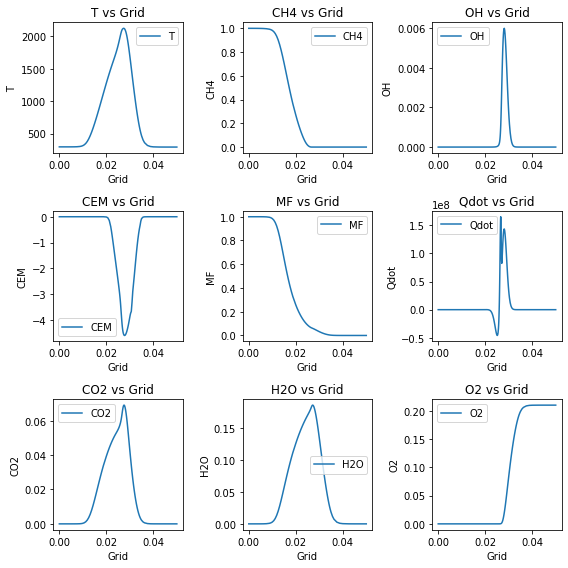

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_file = "../../data/case_CH4_counterflow/CH4_NP_0.csv"
df = pd.read_csv(csv_file)

# Extract the relevant columns for plotting
columns_to_plot = ['T', 'CH4', 'OH', 'CEM', 'MF', 'Qdot', 'CO2', 'H2O', 'O2']
# columns_to_plot = ['T', 'Y_CH4', 'Y_OH', 'CEM', 'MF', 'Qdot', 'Y_CO2', 'Y_H2O', 'Y_CH3']

df_to_plot = df[columns_to_plot]

# Create a 3x3 subplot
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through variables and plot each one
for i, var in enumerate(columns_to_plot):
    axes[i].plot(df['grid'], df_to_plot[var], label=var)
    axes[i].set_xlabel('Grid')
    axes[i].set_ylabel(var)
    # axes[i].set_yscale('log')
    axes[i].set_title(f'{var} vs Grid')
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

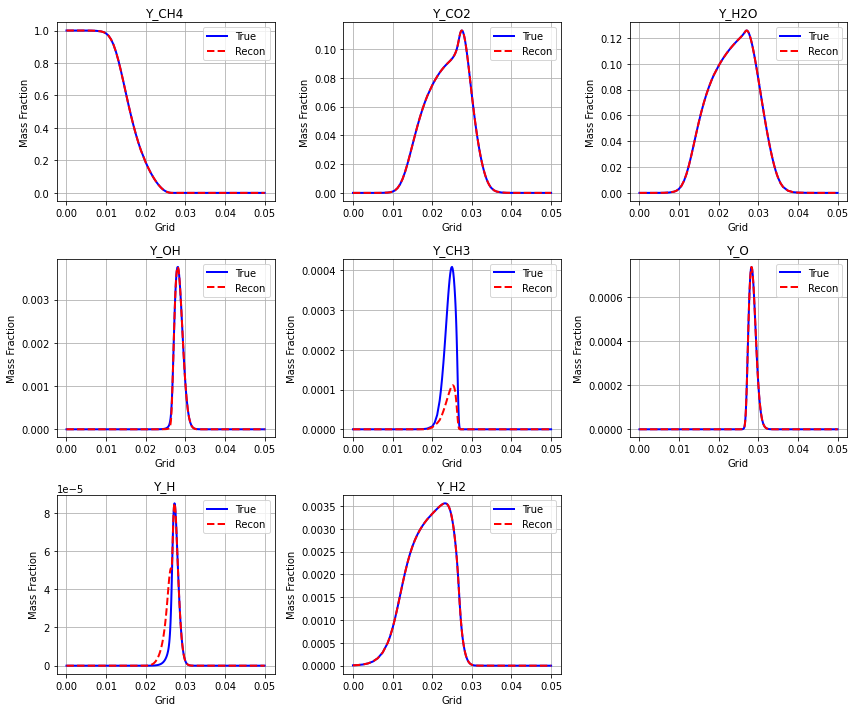

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the true and reconstructed data
true_csv_file = "../../data/case_CH4_counterflow/CH4_NP_0.csv"
recon_csv_file = "recon/CH4_NP_0_recon.csv"

df_true = pd.read_csv(true_csv_file)
df_recon = pd.read_csv(recon_csv_file)

# Extract the relevant columns for plotting
columns_to_plot = ['Y_CH4', 'Y_CO2', 'Y_H2O', 'Y_OH', 'Y_CH3', 'Y_O', 'Y_H', 'Y_H2']

# Create a 3x3 subplot
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

# Loop through variables and plot both true and recon data
for i, var in enumerate(columns_to_plot):
    # Plot true data (solid line)
    axes[i].plot(df_true['grid'], df_true[var], 'b-', label='True', linewidth=2)
    
    # Plot reconstructed data (dashed line)
    axes[i].plot(df_true['grid'], df_recon[var], 'r--', label='Recon', linewidth=2)
    
    axes[i].set_xlabel('Grid')
    axes[i].set_ylabel('Mass Fraction')
    axes[i].set_title(var)
    axes[i].legend()
    axes[i].grid(True)

# Remove extra subplots if columns_to_plot has less than 9 elements
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()